**Importing Librabries**

In [1]:
!pip install catboost lightgbm xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Loading Dataset**

*Importing and reading the data from a specified source (e.g., CSV, Excel, database) into the chosen programming environment*

In [3]:
train = pd.read_csv("C:/Users/Surya/Desktop/KaggleSpaceship Try2/train.csv")
test = pd.read_csv("C:/Users/Surya/Desktop/KaggleSpaceship Try2/test.csv")

In [4]:
#Displays the first 5 rows of the data
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Data Description**

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


**Analysing Data**

- Staistical Analysis 
- Visualization 

In [5]:
#Gives a complete statstical understanding of the data. The use of **include = 'all'** gives description of the whole dataset
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
#Gives a concise summary of the datatypes, nullvalues, total entries and sturucture of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
#Displays all the unique values of a particular column
train['PassengerId'].unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [8]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

**Data Visualization**

- Pairplot : Displays pairwise relationships between multiple variables in a dataset (Numeric Data)
- Correlation Matrix : Correlations between multiple variables in a dataset (Multivariate Analysis)
- Other possible plots --> Count Plot, Histogram, Hexbin Plot, Line Plot 

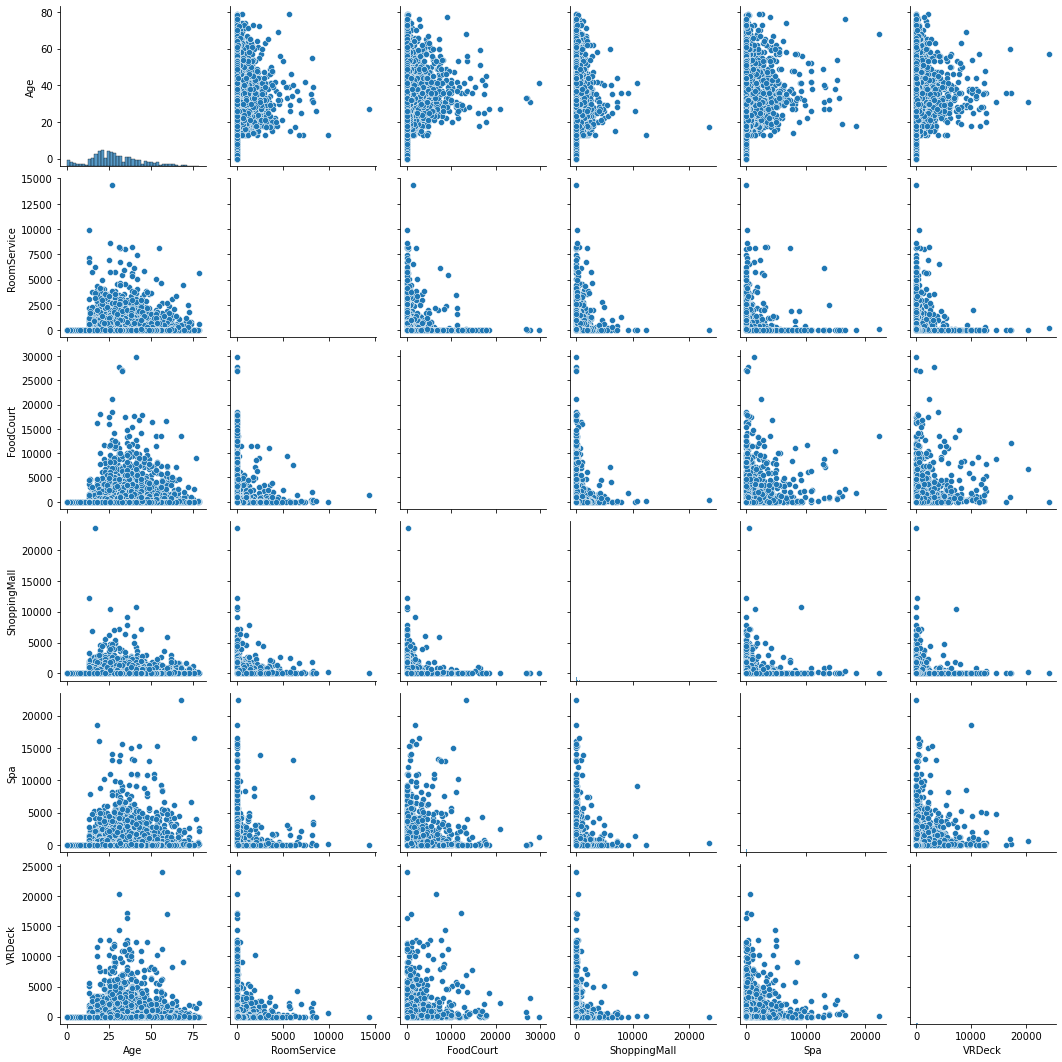

In [9]:
#The numeric variables from the data are used to plot - Pair Plot 
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

sns.pairplot(train[numeric_columns])
plt.show()

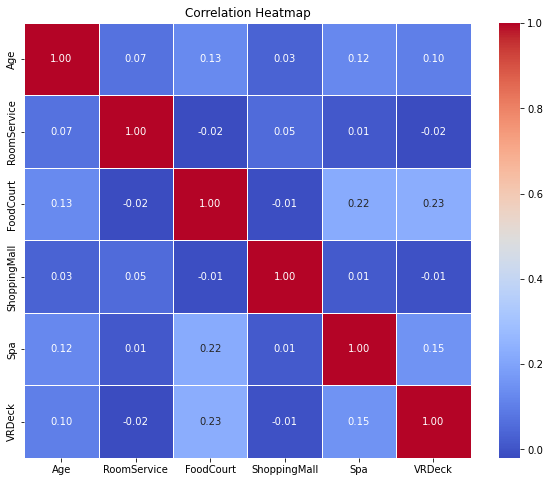

In [10]:
#The matrix provides understanding of how one feature affects the other features i.e. direct or indirect
correlation_matrix = train.select_dtypes(include=['float64', 'int']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**

* Process in which data is made ready for model training. This is a critical step greatly impacts the accuracy and effectiveness of the model.*

- Cleaning 
- Feature Engineering
- Data Splitting

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
#Column PassengerId is split into two different columns. For exploring futher for any feature importance.
train[['Group', 'Person']] = train['PassengerId'].str.split('_', expand=True)

#We tend to remove the existing column to reduce complexity of the data
train.drop('PassengerId', axis=1, inplace=True)

In [13]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Person
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [14]:
train['Group'].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [15]:
#Function gives a count of the total unique vales on the column
train['Group'].nunique()

6217

In [16]:
#Function gives the datatype of the values in the column
train['Group'].dtypes

dtype('O')

In [17]:
train['Person'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [18]:
#Similarly, I split the Cabin column into Deck, Num, Side 
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

train.drop('Cabin', axis=1, inplace=True)

In [19]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Person,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [20]:
train['Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [21]:
train['Num'].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [22]:
train['Side'].unique()

array(['P', 'S', nan], dtype=object)

In [23]:
train[['fName', 'lName']] = train['Name'].str.split(' ', expand=True)

train.drop('Name', axis=1, inplace=True)

In [24]:
#Preprocessed Dataset 
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,fName,lName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Group         8693 non-null   object 
 12  Person        8693 non-null   object 
 13  Deck          8494 non-null   object 
 14  Num           8494 non-null   object 
 15  Side          8494 non-null   object 
 16  fName         8493 non-null   object 
 17  lName         8493 non-null   object 
dtypes: bool(1), float64(6), obje

In [26]:
#To add an additional feature; I create a new colum called 'Expense' to store the sum of all the expenditures
train['expense'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [27]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,fName,lName,expense
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines,1091.0


In [28]:
#Function to preprocess data
def process(df):
    df[['Group', 'Person']] = df['PassengerId'].str.split('_', expand=True)
    df.drop('PassengerId', axis=1, inplace=True)
    
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df.drop('Cabin', axis=1, inplace=True)
    
    df[['fName', 'lName']] = df['Name'].str.split(' ', expand=True)
    df.drop('Name', axis=1, inplace=True)
    
    df['expense'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [29]:
#Data Preprocessing for the test dataset
process(test)

In [30]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Deck,Num,Side,fName,lName,expense
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,Nelly,Carsoning,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4,S,Lerome,Peckers,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,C,0,S,Sabih,Unhearfus,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,C,1,S,Meratz,Caltilter,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,F,5,S,Brence,Harperez,645.0


**Data Cleaning**

*Identifying and handling missing or incorrect data, dealing with duplicates, and resolving inconsistencies in the dataset.*

- Missing Values

*Using Simple Imputer*

- Scikit learn library used for handling missing values in a dataset by replacing them with appropriate values
- Replaces missing values with the mean, median, most frequent value, or a constant value specified by the user (Strategy)

In [31]:
#Displays the counts of missing values in each column
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Group             0
Person            0
Deck            199
Num             199
Side            199
fName           200
lName           200
expense           0
dtype: int64

In [32]:
#I have split the columns into 4 categories for Numerical values(int, float), Categorical values(obj, str), target and name
#Name is a separate column as I will not be working on it. Probably dropping it later.
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'expense']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Group', 'Person', 'Num', 'Deck', 'Side']
name_col = ['fName', 'lName']
trans_col = ['Transported']

In [33]:
#For numeric values, I tend to take the Mean of the data column (Not the best approach)
imputer = SimpleImputer(strategy='mean')
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])

In [34]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Person            0
Deck            199
Num             199
Side            199
fName           200
lName           200
expense           0
dtype: int64

In [35]:
#For categorical columns, I tend to use the strategy 'most_frequent' i.e Mode
imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = imputer.fit_transform(train[categorical_cols])

In [36]:
#Missing values are handled. 'Name' is not a impactful feature yet.
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Person            0
Deck              0
Num               0
Side              0
fName           200
lName           200
expense           0
dtype: int64

In [37]:
#Updating the expense column after handling missing values
train['expense'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [38]:
#Just filling the missing values for 'Name' as Unknown
train['fName'].fillna('Unknown', inplace=True)
train['lName'].fillna('Unknown', inplace=True)

In [39]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Person          0
Deck            0
Num             0
Side            0
fName           0
lName           0
expense         0
dtype: int64

In [40]:
#Function to clean the dataset
def clean(df):
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    df[categorical_cols] = imputer.fit_transform(df[categorical_cols])
    
    df['expense'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    
    df['fName'].fillna('Unknown', inplace=True)
    df['lName'].fillna('Unknown', inplace=True)

In [41]:
#Cleaning the test dataset
clean(test)

In [42]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Person          0
Deck            0
Num             0
Side            0
fName           0
lName           0
expense         0
dtype: int64

**Feature Engineering**

*Involves creating new features or modifying existing ones to enhance the predictive power and performance.*
*A crucial step in the data preprocessing.*

- Feature Encoding
- Scaling Data

*For Feature Encoding, I've used:*

- Label Encoding : Convert categorical data into numerical format
- One Hot Encoding : Convert categorical variables into a binary representation

*For Scaling,I've used*

- Standard Scaler : To standardize numeric values on a normal distribution with mean from 0 to 1

In [43]:
train['Side'].unique()

array(['P', 'S'], dtype=object)

In [44]:
#Performing One Hot Encoding by creating dummy variables for unique values from the column. The binary values reduce complexity in data
cols = ['Deck']

train = pd.get_dummies(train, columns=cols)

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Num,Side,fName,lName,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,0,P,Maham,Ofracculy,0.0,0,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,0,S,Juanna,Vines,736.0,0,0,0,0,0,1,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,0,S,Altark,Susent,10383.0,1,0,0,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,0,S,Solam,Susent,5176.0,1,0,0,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,1,S,Willy,Santantines,1091.0,0,0,0,0,0,1,0,0


In [46]:
#Performing label encoding to categorical columns
le_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Num']

label_encoder = LabelEncoder()

for col in le_cols:
    train[col] = label_encoder.fit_transform(train[col].astype(str))

In [47]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Num,Side,fName,lName,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,01,0,0,Maham,Ofracculy,0.0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,01,0,1,Juanna,Vines,736.0,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,0,1,Altark,Susent,10383.0,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,0,1,Solam,Susent,5176.0,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,01,1,1,Willy,Santantines,1091.0,0,0,0,0,0,1,0,0


In [48]:
#train['Transported'] = label_encoder.fit_transform(train['Transported'].astype(str))

In [49]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Num,Side,fName,lName,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,01,0,0,Maham,Ofracculy,0.0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,01,0,1,Juanna,Vines,736.0,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,0,1,Altark,Susent,10383.0,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,0,1,Solam,Susent,5176.0,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,01,1,1,Willy,Santantines,1091.0,0,0,0,0,0,1,0,0


In [50]:
#Dropping the columns that dont have significance in data modelling
d_cols = ['Group', 'Person', 'fName', 'lName']

train.drop(d_cols, axis=1, inplace=True)

In [51]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,Side,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0,0.0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,1,736.0,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,10383.0,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,5176.0,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1,1091.0,0,0,0,0,0,1,0,0


In [52]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Deck,Num,Side,fName,lName,expense
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,Nelly,Carsoning,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4,S,Lerome,Peckers,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,C,0,S,Sabih,Unhearfus,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,C,1,S,Meratz,Caltilter,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,F,5,S,Brence,Harperez,645.0


In [53]:
#Function for feature engineering (Categorical Features)
def fe_eng(df):
    cols = ['Deck']
    df = pd.get_dummies(df, columns=cols)
    
    le_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Num']
    label_encoder = LabelEncoder()

    for col in le_cols:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
        
    return df

In [54]:
#Feature Engineering the test dataset
test = fe_eng(test)

In [55]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Num,Side,fName,lName,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0013,01,820,1,Nelly,Carsoning,0.0,0,0,0,0,0,0,1,0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0018,01,927,1,Lerome,Peckers,2832.0,0,0,0,0,0,1,0,0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,0019,01,0,1,Sabih,Unhearfus,0.0,0,0,1,0,0,0,0,0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,0021,01,1,1,Meratz,Caltilter,7418.0,0,0,1,0,0,0,0,0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,0023,01,1029,1,Brence,Harperez,645.0,0,0,0,0,0,1,0,0


In [56]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Num             0
Side            0
expense         0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
dtype: int64

In [57]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Person          0
Num             0
Side            0
fName           0
lName           0
expense         0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
dtype: int64

In [58]:
#Function to scale data (Numeric Columns)
def scale(df):
    numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'expense']
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

train = scale(train)
test = scale(test)

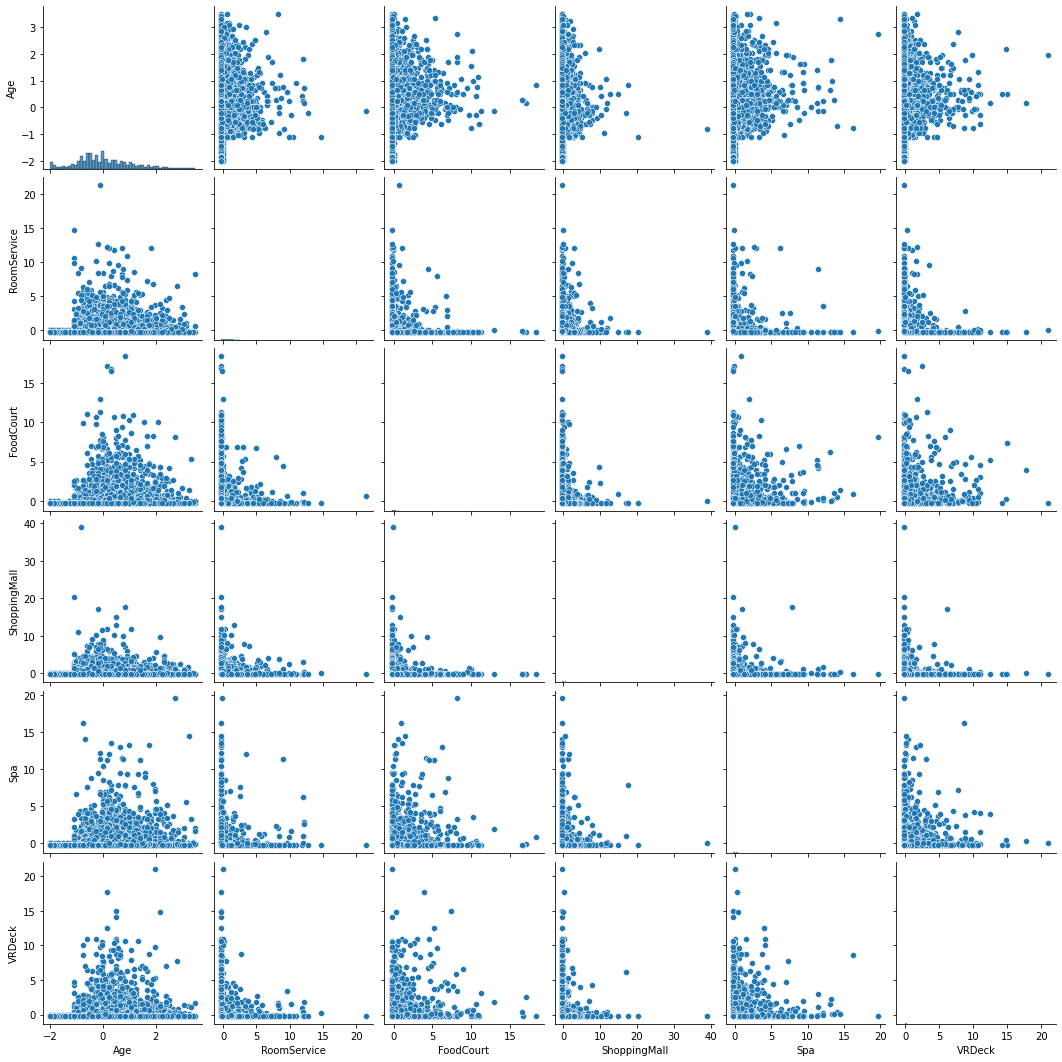

In [59]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

sns.pairplot(train[numeric_columns])
plt.show()

**Data Splitting**

*Dataset is divided into separate subsets to train and evaluate models effectively*

- Train Set
- Test Set
- Validate Set (We don't do it now)

In [60]:
#Splitting train data into train and test set with Train (70%) and Test(30%)
X = train.drop("Transported", axis=1).values
y = train["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Model Selection**

*Goal is to choose the best model from a set of candidate models for a specific task or problem*

- Cross Validation Techinque - StratifiedKFold CV

*Resampling technique used to evaluate the performance of machine learning models and estimate their accuracy on new, unseen data*

In [61]:
#Efficiently evaluates multiple machine learning classifiers using cross-validation 
#Provides a comparison of their performance based on accuracy
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CatBoost', CatBoostClassifier()))
models.append(('LightGBM', lgb.LGBMClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('LinearSVC', LinearSVC()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('GaussianNB', GaussianNB()))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("cv_results", cv_results)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cv_results [0.8022339  0.79750164 0.79684418 0.78829717]
Logistic Regression: 0.796219 (0.005024)

cv_results [0.75361367 0.75805391 0.73504274 0.7304405 ]
Decision Tree: 0.744288 (0.011765)

cv_results [0.81340342 0.80539119 0.80078895 0.79947403]
Random Forest: 0.804764 (0.005450)

cv_results [0.53679369 0.53122945 0.51676529 0.53714661]
SVM: 0.530484 (0.008261)

cv_results [0.61366623 0.60946746 0.59763314 0.58645628]
KNN: 0.601806 (0.010635)

Learning rate set to 0.019699
0:	learn: 0.6820509	total: 144ms	remaining: 2m 23s
1:	learn: 0.6720044	total: 148ms	remaining: 1m 14s
2:	learn: 0.6633998	total: 152ms	remaining: 50.4s
3:	learn: 0.6563410	total: 156ms	remaining: 38.8s
4:	learn: 0.6479012	total: 159ms	remaining: 31.7s
5:	learn: 0.6403517	total: 162ms	remaining: 26.9s
6:	learn: 0.6335485	total: 166ms	remaining: 23.5s
7:	learn: 0.6255110	total: 169ms	remaining: 21s
8:	learn: 0.6199775	total: 173ms	remaining: 19s
9:	learn: 0.6139387	total: 176ms	remaining: 17.4s
10:	learn: 0.6078972	

193:	learn: 0.3878870	total: 835ms	remaining: 3.47s
194:	learn: 0.3876986	total: 838ms	remaining: 3.46s
195:	learn: 0.3874549	total: 842ms	remaining: 3.45s
196:	learn: 0.3871731	total: 845ms	remaining: 3.44s
197:	learn: 0.3869506	total: 849ms	remaining: 3.44s
198:	learn: 0.3867605	total: 853ms	remaining: 3.43s
199:	learn: 0.3862879	total: 857ms	remaining: 3.43s
200:	learn: 0.3860316	total: 861ms	remaining: 3.42s
201:	learn: 0.3854752	total: 865ms	remaining: 3.42s
202:	learn: 0.3852389	total: 868ms	remaining: 3.41s
203:	learn: 0.3850649	total: 871ms	remaining: 3.4s
204:	learn: 0.3848841	total: 874ms	remaining: 3.39s
205:	learn: 0.3845642	total: 878ms	remaining: 3.38s
206:	learn: 0.3843961	total: 881ms	remaining: 3.38s
207:	learn: 0.3841554	total: 884ms	remaining: 3.37s
208:	learn: 0.3839029	total: 887ms	remaining: 3.36s
209:	learn: 0.3836281	total: 891ms	remaining: 3.35s
210:	learn: 0.3834430	total: 894ms	remaining: 3.34s
211:	learn: 0.3831650	total: 898ms	remaining: 3.34s
212:	learn: 0

389:	learn: 0.3480021	total: 1.53s	remaining: 2.39s
390:	learn: 0.3478706	total: 1.53s	remaining: 2.39s
391:	learn: 0.3476429	total: 1.54s	remaining: 2.38s
392:	learn: 0.3474525	total: 1.54s	remaining: 2.38s
393:	learn: 0.3473320	total: 1.54s	remaining: 2.38s
394:	learn: 0.3471814	total: 1.55s	remaining: 2.37s
395:	learn: 0.3470749	total: 1.55s	remaining: 2.37s
396:	learn: 0.3469130	total: 1.56s	remaining: 2.37s
397:	learn: 0.3466410	total: 1.56s	remaining: 2.36s
398:	learn: 0.3464608	total: 1.57s	remaining: 2.36s
399:	learn: 0.3462631	total: 1.57s	remaining: 2.36s
400:	learn: 0.3461863	total: 1.57s	remaining: 2.35s
401:	learn: 0.3459907	total: 1.58s	remaining: 2.35s
402:	learn: 0.3457827	total: 1.58s	remaining: 2.35s
403:	learn: 0.3456159	total: 1.59s	remaining: 2.34s
404:	learn: 0.3454893	total: 1.59s	remaining: 2.34s
405:	learn: 0.3453054	total: 1.6s	remaining: 2.34s
406:	learn: 0.3451959	total: 1.6s	remaining: 2.33s
407:	learn: 0.3450405	total: 1.61s	remaining: 2.33s
408:	learn: 0.

584:	learn: 0.3187189	total: 2.23s	remaining: 1.58s
585:	learn: 0.3184635	total: 2.23s	remaining: 1.57s
586:	learn: 0.3183182	total: 2.23s	remaining: 1.57s
587:	learn: 0.3182062	total: 2.23s	remaining: 1.57s
588:	learn: 0.3181151	total: 2.24s	remaining: 1.56s
589:	learn: 0.3179211	total: 2.24s	remaining: 1.56s
590:	learn: 0.3178083	total: 2.25s	remaining: 1.55s
591:	learn: 0.3177198	total: 2.25s	remaining: 1.55s
592:	learn: 0.3175574	total: 2.25s	remaining: 1.55s
593:	learn: 0.3172936	total: 2.26s	remaining: 1.54s
594:	learn: 0.3171431	total: 2.26s	remaining: 1.54s
595:	learn: 0.3170673	total: 2.26s	remaining: 1.53s
596:	learn: 0.3169157	total: 2.27s	remaining: 1.53s
597:	learn: 0.3167293	total: 2.27s	remaining: 1.53s
598:	learn: 0.3165666	total: 2.27s	remaining: 1.52s
599:	learn: 0.3164227	total: 2.28s	remaining: 1.52s
600:	learn: 0.3163044	total: 2.28s	remaining: 1.51s
601:	learn: 0.3162110	total: 2.28s	remaining: 1.51s
602:	learn: 0.3161186	total: 2.29s	remaining: 1.5s
603:	learn: 0

763:	learn: 0.2945918	total: 2.92s	remaining: 902ms
764:	learn: 0.2944589	total: 2.92s	remaining: 899ms
765:	learn: 0.2943596	total: 2.93s	remaining: 895ms
766:	learn: 0.2941720	total: 2.93s	remaining: 891ms
767:	learn: 0.2941001	total: 2.94s	remaining: 887ms
768:	learn: 0.2939548	total: 2.94s	remaining: 883ms
769:	learn: 0.2938648	total: 2.94s	remaining: 880ms
770:	learn: 0.2937700	total: 2.95s	remaining: 876ms
771:	learn: 0.2935546	total: 2.95s	remaining: 872ms
772:	learn: 0.2934371	total: 2.96s	remaining: 868ms
773:	learn: 0.2932818	total: 2.96s	remaining: 864ms
774:	learn: 0.2931641	total: 2.96s	remaining: 861ms
775:	learn: 0.2930115	total: 2.97s	remaining: 857ms
776:	learn: 0.2928796	total: 2.97s	remaining: 853ms
777:	learn: 0.2927979	total: 2.98s	remaining: 849ms
778:	learn: 0.2927164	total: 2.98s	remaining: 845ms
779:	learn: 0.2926134	total: 2.98s	remaining: 842ms
780:	learn: 0.2925406	total: 2.99s	remaining: 838ms
781:	learn: 0.2924323	total: 2.99s	remaining: 834ms
782:	learn: 

951:	learn: 0.2733214	total: 3.61s	remaining: 182ms
952:	learn: 0.2731816	total: 3.62s	remaining: 178ms
953:	learn: 0.2731168	total: 3.62s	remaining: 175ms
954:	learn: 0.2729897	total: 3.62s	remaining: 171ms
955:	learn: 0.2728750	total: 3.63s	remaining: 167ms
956:	learn: 0.2727338	total: 3.63s	remaining: 163ms
957:	learn: 0.2726145	total: 3.63s	remaining: 159ms
958:	learn: 0.2725474	total: 3.64s	remaining: 156ms
959:	learn: 0.2724230	total: 3.64s	remaining: 152ms
960:	learn: 0.2723309	total: 3.64s	remaining: 148ms
961:	learn: 0.2722154	total: 3.65s	remaining: 144ms
962:	learn: 0.2720804	total: 3.65s	remaining: 140ms
963:	learn: 0.2719409	total: 3.65s	remaining: 137ms
964:	learn: 0.2718165	total: 3.66s	remaining: 133ms
965:	learn: 0.2717310	total: 3.66s	remaining: 129ms
966:	learn: 0.2715681	total: 3.67s	remaining: 125ms
967:	learn: 0.2715308	total: 3.67s	remaining: 121ms
968:	learn: 0.2714028	total: 3.67s	remaining: 117ms
969:	learn: 0.2712407	total: 3.67s	remaining: 114ms
970:	learn: 

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 107, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  File "<__array_function__ internals>", line 5, in union1d
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 752, in union1d
    return unique(np.concatenate((ar1, ar2), axis=None))
  File "<__array_function__ internals>", line 5, in unique
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 262, in unique
    ret = _unique1d(ar, return_index, return_inverse, return_counts)
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 323, in _unique1d
    ar.sort()
TypeError: '<' not supported between in

23:	learn: 0.5477066	total: 81.9ms	remaining: 3.33s
24:	learn: 0.5440307	total: 85.3ms	remaining: 3.33s
25:	learn: 0.5412140	total: 89.3ms	remaining: 3.34s
26:	learn: 0.5375860	total: 92.9ms	remaining: 3.35s
27:	learn: 0.5346736	total: 96.9ms	remaining: 3.36s
28:	learn: 0.5310178	total: 101ms	remaining: 3.37s
29:	learn: 0.5274378	total: 105ms	remaining: 3.38s
30:	learn: 0.5243702	total: 108ms	remaining: 3.37s
31:	learn: 0.5211805	total: 111ms	remaining: 3.37s
32:	learn: 0.5186126	total: 115ms	remaining: 3.36s
33:	learn: 0.5165346	total: 118ms	remaining: 3.36s
34:	learn: 0.5136704	total: 122ms	remaining: 3.35s
35:	learn: 0.5108546	total: 125ms	remaining: 3.35s
36:	learn: 0.5085486	total: 129ms	remaining: 3.36s
37:	learn: 0.5064692	total: 133ms	remaining: 3.37s
38:	learn: 0.5045384	total: 137ms	remaining: 3.37s
39:	learn: 0.5027936	total: 140ms	remaining: 3.36s
40:	learn: 0.5010266	total: 144ms	remaining: 3.37s
41:	learn: 0.4989398	total: 148ms	remaining: 3.37s
42:	learn: 0.4971974	total

216:	learn: 0.3831487	total: 778ms	remaining: 2.81s
217:	learn: 0.3827903	total: 782ms	remaining: 2.8s
218:	learn: 0.3825071	total: 785ms	remaining: 2.8s
219:	learn: 0.3822056	total: 789ms	remaining: 2.8s
220:	learn: 0.3818876	total: 793ms	remaining: 2.79s
221:	learn: 0.3816543	total: 796ms	remaining: 2.79s
222:	learn: 0.3814851	total: 801ms	remaining: 2.79s
223:	learn: 0.3810777	total: 804ms	remaining: 2.79s
224:	learn: 0.3808420	total: 808ms	remaining: 2.78s
225:	learn: 0.3805231	total: 812ms	remaining: 2.78s
226:	learn: 0.3802488	total: 815ms	remaining: 2.77s
227:	learn: 0.3800833	total: 820ms	remaining: 2.77s
228:	learn: 0.3798705	total: 824ms	remaining: 2.77s
229:	learn: 0.3794043	total: 828ms	remaining: 2.77s
230:	learn: 0.3791894	total: 832ms	remaining: 2.77s
231:	learn: 0.3789873	total: 835ms	remaining: 2.77s
232:	learn: 0.3786816	total: 839ms	remaining: 2.76s
233:	learn: 0.3783385	total: 843ms	remaining: 2.76s
234:	learn: 0.3781365	total: 846ms	remaining: 2.75s
235:	learn: 0.3

412:	learn: 0.3460456	total: 1.47s	remaining: 2.1s
413:	learn: 0.3458729	total: 1.48s	remaining: 2.09s
414:	learn: 0.3457682	total: 1.48s	remaining: 2.09s
415:	learn: 0.3456498	total: 1.48s	remaining: 2.08s
416:	learn: 0.3453696	total: 1.49s	remaining: 2.08s
417:	learn: 0.3452037	total: 1.49s	remaining: 2.08s
418:	learn: 0.3450886	total: 1.5s	remaining: 2.07s
419:	learn: 0.3448154	total: 1.5s	remaining: 2.07s
420:	learn: 0.3447554	total: 1.5s	remaining: 2.07s
421:	learn: 0.3446083	total: 1.5s	remaining: 2.06s
422:	learn: 0.3444691	total: 1.51s	remaining: 2.06s
423:	learn: 0.3443426	total: 1.51s	remaining: 2.05s
424:	learn: 0.3442412	total: 1.51s	remaining: 2.05s
425:	learn: 0.3441422	total: 1.52s	remaining: 2.05s
426:	learn: 0.3439984	total: 1.52s	remaining: 2.04s
427:	learn: 0.3438462	total: 1.53s	remaining: 2.04s
428:	learn: 0.3437557	total: 1.53s	remaining: 2.04s
429:	learn: 0.3435811	total: 1.53s	remaining: 2.03s
430:	learn: 0.3434243	total: 1.54s	remaining: 2.03s
431:	learn: 0.343

609:	learn: 0.3178646	total: 2.17s	remaining: 1.39s
610:	learn: 0.3177374	total: 2.17s	remaining: 1.38s
611:	learn: 0.3176038	total: 2.17s	remaining: 1.38s
612:	learn: 0.3174999	total: 2.18s	remaining: 1.38s
613:	learn: 0.3173622	total: 2.18s	remaining: 1.37s
614:	learn: 0.3171731	total: 2.19s	remaining: 1.37s
615:	learn: 0.3169976	total: 2.19s	remaining: 1.36s
616:	learn: 0.3168790	total: 2.19s	remaining: 1.36s
617:	learn: 0.3166929	total: 2.2s	remaining: 1.36s
618:	learn: 0.3165450	total: 2.2s	remaining: 1.35s
619:	learn: 0.3163990	total: 2.2s	remaining: 1.35s
620:	learn: 0.3163482	total: 2.21s	remaining: 1.35s
621:	learn: 0.3162155	total: 2.21s	remaining: 1.34s
622:	learn: 0.3161656	total: 2.21s	remaining: 1.34s
623:	learn: 0.3160921	total: 2.22s	remaining: 1.34s
624:	learn: 0.3160087	total: 2.22s	remaining: 1.33s
625:	learn: 0.3159123	total: 2.23s	remaining: 1.33s
626:	learn: 0.3157993	total: 2.23s	remaining: 1.33s
627:	learn: 0.3156572	total: 2.23s	remaining: 1.32s
628:	learn: 0.3

807:	learn: 0.2937052	total: 2.86s	remaining: 680ms
808:	learn: 0.2935853	total: 2.87s	remaining: 677ms
809:	learn: 0.2935564	total: 2.87s	remaining: 673ms
810:	learn: 0.2934630	total: 2.87s	remaining: 670ms
811:	learn: 0.2934020	total: 2.88s	remaining: 666ms
812:	learn: 0.2932658	total: 2.88s	remaining: 663ms
813:	learn: 0.2930333	total: 2.88s	remaining: 659ms
814:	learn: 0.2929859	total: 2.89s	remaining: 655ms
815:	learn: 0.2928066	total: 2.89s	remaining: 652ms
816:	learn: 0.2926618	total: 2.9s	remaining: 648ms
817:	learn: 0.2925726	total: 2.9s	remaining: 645ms
818:	learn: 0.2924597	total: 2.9s	remaining: 642ms
819:	learn: 0.2923796	total: 2.91s	remaining: 638ms
820:	learn: 0.2922695	total: 2.91s	remaining: 635ms
821:	learn: 0.2922506	total: 2.92s	remaining: 631ms
822:	learn: 0.2921282	total: 2.92s	remaining: 628ms
823:	learn: 0.2920034	total: 2.92s	remaining: 624ms
824:	learn: 0.2919347	total: 2.93s	remaining: 621ms
825:	learn: 0.2918737	total: 2.93s	remaining: 617ms
826:	learn: 0.2

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 107, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  File "<__array_function__ internals>", line 5, in union1d
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 752, in union1d
    return unique(np.concatenate((ar1, ar2), axis=None))
  File "<__array_function__ internals>", line 5, in unique
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 262, in unique
    ret = _unique1d(ar, return_index, return_inverse, return_counts)
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 323, in _unique1d
    ar.sort()
TypeError: '<' not supported between in

Learning rate set to 0.0197
0:	learn: 0.6847672	total: 3.97ms	remaining: 3.97s
1:	learn: 0.6756447	total: 7.37ms	remaining: 3.68s
2:	learn: 0.6670616	total: 11.4ms	remaining: 3.79s
3:	learn: 0.6583702	total: 14.7ms	remaining: 3.66s
4:	learn: 0.6504669	total: 18.6ms	remaining: 3.69s
5:	learn: 0.6427567	total: 22ms	remaining: 3.65s
6:	learn: 0.6362825	total: 25.6ms	remaining: 3.63s
7:	learn: 0.6287149	total: 29.3ms	remaining: 3.64s
8:	learn: 0.6230304	total: 32.7ms	remaining: 3.6s
9:	learn: 0.6178264	total: 36.4ms	remaining: 3.61s
10:	learn: 0.6103986	total: 40.1ms	remaining: 3.6s
11:	learn: 0.6043284	total: 44.4ms	remaining: 3.66s
12:	learn: 0.5965593	total: 49.5ms	remaining: 3.76s
13:	learn: 0.5921394	total: 53.8ms	remaining: 3.79s
14:	learn: 0.5865388	total: 58ms	remaining: 3.81s
15:	learn: 0.5819002	total: 62ms	remaining: 3.81s
16:	learn: 0.5781842	total: 65.8ms	remaining: 3.81s
17:	learn: 0.5737068	total: 70.6ms	remaining: 3.85s
18:	learn: 0.5698677	total: 74.8ms	remaining: 3.86s
19

180:	learn: 0.3927959	total: 691ms	remaining: 3.13s
181:	learn: 0.3924469	total: 695ms	remaining: 3.12s
182:	learn: 0.3921332	total: 698ms	remaining: 3.12s
183:	learn: 0.3917634	total: 702ms	remaining: 3.11s
184:	learn: 0.3912129	total: 705ms	remaining: 3.11s
185:	learn: 0.3908792	total: 709ms	remaining: 3.1s
186:	learn: 0.3905267	total: 713ms	remaining: 3.1s
187:	learn: 0.3901327	total: 717ms	remaining: 3.1s
188:	learn: 0.3898666	total: 721ms	remaining: 3.09s
189:	learn: 0.3896820	total: 724ms	remaining: 3.08s
190:	learn: 0.3894457	total: 727ms	remaining: 3.08s
191:	learn: 0.3889033	total: 730ms	remaining: 3.07s
192:	learn: 0.3884868	total: 734ms	remaining: 3.07s
193:	learn: 0.3881913	total: 737ms	remaining: 3.06s
194:	learn: 0.3878829	total: 741ms	remaining: 3.06s
195:	learn: 0.3876532	total: 744ms	remaining: 3.05s
196:	learn: 0.3873770	total: 747ms	remaining: 3.05s
197:	learn: 0.3870877	total: 751ms	remaining: 3.04s
198:	learn: 0.3868624	total: 754ms	remaining: 3.04s
199:	learn: 0.3

374:	learn: 0.3494985	total: 1.39s	remaining: 2.31s
375:	learn: 0.3493873	total: 1.39s	remaining: 2.31s
376:	learn: 0.3492075	total: 1.39s	remaining: 2.3s
377:	learn: 0.3491244	total: 1.4s	remaining: 2.3s
378:	learn: 0.3489272	total: 1.4s	remaining: 2.3s
379:	learn: 0.3486704	total: 1.4s	remaining: 2.29s
380:	learn: 0.3485003	total: 1.41s	remaining: 2.29s
381:	learn: 0.3483958	total: 1.41s	remaining: 2.29s
382:	learn: 0.3483000	total: 1.42s	remaining: 2.28s
383:	learn: 0.3481740	total: 1.42s	remaining: 2.28s
384:	learn: 0.3479766	total: 1.42s	remaining: 2.27s
385:	learn: 0.3478222	total: 1.43s	remaining: 2.27s
386:	learn: 0.3476638	total: 1.43s	remaining: 2.27s
387:	learn: 0.3474785	total: 1.44s	remaining: 2.26s
388:	learn: 0.3473391	total: 1.44s	remaining: 2.26s
389:	learn: 0.3471852	total: 1.44s	remaining: 2.26s
390:	learn: 0.3470698	total: 1.45s	remaining: 2.25s
391:	learn: 0.3469824	total: 1.45s	remaining: 2.25s
392:	learn: 0.3468016	total: 1.45s	remaining: 2.25s
393:	learn: 0.3467

569:	learn: 0.3192563	total: 2.08s	remaining: 1.57s
570:	learn: 0.3190164	total: 2.08s	remaining: 1.57s
571:	learn: 0.3189382	total: 2.09s	remaining: 1.56s
572:	learn: 0.3187839	total: 2.09s	remaining: 1.56s
573:	learn: 0.3186309	total: 2.1s	remaining: 1.56s
574:	learn: 0.3183534	total: 2.1s	remaining: 1.55s
575:	learn: 0.3182429	total: 2.1s	remaining: 1.55s
576:	learn: 0.3181246	total: 2.11s	remaining: 1.55s
577:	learn: 0.3180513	total: 2.11s	remaining: 1.54s
578:	learn: 0.3178688	total: 2.12s	remaining: 1.54s
579:	learn: 0.3176829	total: 2.12s	remaining: 1.53s
580:	learn: 0.3175742	total: 2.12s	remaining: 1.53s
581:	learn: 0.3173954	total: 2.13s	remaining: 1.53s
582:	learn: 0.3172450	total: 2.13s	remaining: 1.52s
583:	learn: 0.3170293	total: 2.13s	remaining: 1.52s
584:	learn: 0.3168143	total: 2.14s	remaining: 1.51s
585:	learn: 0.3167182	total: 2.14s	remaining: 1.51s
586:	learn: 0.3165929	total: 2.14s	remaining: 1.51s
587:	learn: 0.3164584	total: 2.15s	remaining: 1.5s
588:	learn: 0.31

764:	learn: 0.2919714	total: 2.78s	remaining: 853ms
765:	learn: 0.2918832	total: 2.78s	remaining: 849ms
766:	learn: 0.2916570	total: 2.78s	remaining: 846ms
767:	learn: 0.2915175	total: 2.79s	remaining: 842ms
768:	learn: 0.2914493	total: 2.79s	remaining: 839ms
769:	learn: 0.2913270	total: 2.8s	remaining: 835ms
770:	learn: 0.2911710	total: 2.8s	remaining: 832ms
771:	learn: 0.2910142	total: 2.8s	remaining: 828ms
772:	learn: 0.2908906	total: 2.81s	remaining: 825ms
773:	learn: 0.2907331	total: 2.81s	remaining: 821ms
774:	learn: 0.2906053	total: 2.81s	remaining: 817ms
775:	learn: 0.2905378	total: 2.82s	remaining: 814ms
776:	learn: 0.2903661	total: 2.82s	remaining: 810ms
777:	learn: 0.2902470	total: 2.83s	remaining: 807ms
778:	learn: 0.2901495	total: 2.83s	remaining: 803ms
779:	learn: 0.2899197	total: 2.84s	remaining: 800ms
780:	learn: 0.2898041	total: 2.84s	remaining: 796ms
781:	learn: 0.2895564	total: 2.84s	remaining: 793ms
782:	learn: 0.2894644	total: 2.85s	remaining: 789ms
783:	learn: 0.2

956:	learn: 0.2697339	total: 3.47s	remaining: 156ms
957:	learn: 0.2696414	total: 3.47s	remaining: 152ms
958:	learn: 0.2695269	total: 3.48s	remaining: 149ms
959:	learn: 0.2694419	total: 3.48s	remaining: 145ms
960:	learn: 0.2693355	total: 3.48s	remaining: 141ms
961:	learn: 0.2692509	total: 3.49s	remaining: 138ms
962:	learn: 0.2691573	total: 3.49s	remaining: 134ms
963:	learn: 0.2690387	total: 3.5s	remaining: 131ms
964:	learn: 0.2689679	total: 3.5s	remaining: 127ms
965:	learn: 0.2688704	total: 3.5s	remaining: 123ms
966:	learn: 0.2687699	total: 3.51s	remaining: 120ms
967:	learn: 0.2686856	total: 3.51s	remaining: 116ms
968:	learn: 0.2686014	total: 3.51s	remaining: 112ms
969:	learn: 0.2685198	total: 3.52s	remaining: 109ms
970:	learn: 0.2684397	total: 3.52s	remaining: 105ms
971:	learn: 0.2683346	total: 3.52s	remaining: 101ms
972:	learn: 0.2682391	total: 3.53s	remaining: 97.9ms
973:	learn: 0.2681226	total: 3.53s	remaining: 94.2ms
974:	learn: 0.2679657	total: 3.53s	remaining: 90.6ms
975:	learn: 

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 107, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  File "<__array_function__ internals>", line 5, in union1d
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 752, in union1d
    return unique(np.concatenate((ar1, ar2), axis=None))
  File "<__array_function__ internals>", line 5, in unique
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 262, in unique
    ret = _unique1d(ar, return_index, return_inverse, return_counts)
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 323, in _unique1d
    ar.sort()
TypeError: '<' not supported between in

Learning rate set to 0.0197
0:	learn: 0.6854165	total: 3.68ms	remaining: 3.67s
1:	learn: 0.6769764	total: 7.09ms	remaining: 3.54s
2:	learn: 0.6695540	total: 10.4ms	remaining: 3.46s
3:	learn: 0.6619155	total: 13.7ms	remaining: 3.4s
4:	learn: 0.6531716	total: 17ms	remaining: 3.39s
5:	learn: 0.6458973	total: 20.2ms	remaining: 3.35s
6:	learn: 0.6393302	total: 23.4ms	remaining: 3.32s
7:	learn: 0.6314254	total: 26.8ms	remaining: 3.32s
8:	learn: 0.6258144	total: 29.9ms	remaining: 3.29s
9:	learn: 0.6207952	total: 33.4ms	remaining: 3.31s
10:	learn: 0.6135444	total: 36.5ms	remaining: 3.28s
11:	learn: 0.6073668	total: 39.8ms	remaining: 3.27s
12:	learn: 0.5996208	total: 42.9ms	remaining: 3.26s
13:	learn: 0.5949986	total: 46.2ms	remaining: 3.25s
14:	learn: 0.5881830	total: 49.6ms	remaining: 3.26s
15:	learn: 0.5835893	total: 52.9ms	remaining: 3.25s
16:	learn: 0.5788979	total: 56.1ms	remaining: 3.24s
17:	learn: 0.5740035	total: 59.5ms	remaining: 3.24s
18:	learn: 0.5689615	total: 63.3ms	remaining: 3.2

192:	learn: 0.3836651	total: 694ms	remaining: 2.9s
193:	learn: 0.3832934	total: 698ms	remaining: 2.9s
194:	learn: 0.3830832	total: 701ms	remaining: 2.9s
195:	learn: 0.3828596	total: 705ms	remaining: 2.89s
196:	learn: 0.3826155	total: 709ms	remaining: 2.89s
197:	learn: 0.3822566	total: 712ms	remaining: 2.88s
198:	learn: 0.3820393	total: 716ms	remaining: 2.88s
199:	learn: 0.3819370	total: 719ms	remaining: 2.88s
200:	learn: 0.3815885	total: 723ms	remaining: 2.87s
201:	learn: 0.3812957	total: 726ms	remaining: 2.87s
202:	learn: 0.3809712	total: 730ms	remaining: 2.86s
203:	learn: 0.3807536	total: 733ms	remaining: 2.86s
204:	learn: 0.3803830	total: 737ms	remaining: 2.86s
205:	learn: 0.3800684	total: 740ms	remaining: 2.85s
206:	learn: 0.3796685	total: 744ms	remaining: 2.85s
207:	learn: 0.3793517	total: 747ms	remaining: 2.85s
208:	learn: 0.3791379	total: 751ms	remaining: 2.84s
209:	learn: 0.3788556	total: 754ms	remaining: 2.84s
210:	learn: 0.3786483	total: 757ms	remaining: 2.83s
211:	learn: 0.3

384:	learn: 0.3427572	total: 1.39s	remaining: 2.22s
385:	learn: 0.3426631	total: 1.4s	remaining: 2.22s
386:	learn: 0.3424454	total: 1.4s	remaining: 2.22s
387:	learn: 0.3422422	total: 1.41s	remaining: 2.22s
388:	learn: 0.3419369	total: 1.41s	remaining: 2.22s
389:	learn: 0.3417705	total: 1.42s	remaining: 2.22s
390:	learn: 0.3416414	total: 1.43s	remaining: 2.22s
391:	learn: 0.3414332	total: 1.43s	remaining: 2.22s
392:	learn: 0.3412181	total: 1.44s	remaining: 2.22s
393:	learn: 0.3409827	total: 1.44s	remaining: 2.22s
394:	learn: 0.3408744	total: 1.44s	remaining: 2.21s
395:	learn: 0.3407490	total: 1.45s	remaining: 2.21s
396:	learn: 0.3405151	total: 1.45s	remaining: 2.21s
397:	learn: 0.3403598	total: 1.46s	remaining: 2.2s
398:	learn: 0.3402122	total: 1.46s	remaining: 2.2s
399:	learn: 0.3400690	total: 1.47s	remaining: 2.2s
400:	learn: 0.3398765	total: 1.47s	remaining: 2.19s
401:	learn: 0.3397546	total: 1.47s	remaining: 2.19s
402:	learn: 0.3396010	total: 1.48s	remaining: 2.19s
403:	learn: 0.339

552:	learn: 0.3152306	total: 2.09s	remaining: 1.69s
553:	learn: 0.3150222	total: 2.09s	remaining: 1.68s
554:	learn: 0.3148385	total: 2.1s	remaining: 1.68s
555:	learn: 0.3146828	total: 2.1s	remaining: 1.68s
556:	learn: 0.3145246	total: 2.1s	remaining: 1.67s
557:	learn: 0.3143420	total: 2.11s	remaining: 1.67s
558:	learn: 0.3141941	total: 2.11s	remaining: 1.67s
559:	learn: 0.3140625	total: 2.12s	remaining: 1.66s
560:	learn: 0.3138396	total: 2.12s	remaining: 1.66s
561:	learn: 0.3136437	total: 2.12s	remaining: 1.66s
562:	learn: 0.3134533	total: 2.13s	remaining: 1.65s
563:	learn: 0.3133652	total: 2.13s	remaining: 1.65s
564:	learn: 0.3131264	total: 2.13s	remaining: 1.64s
565:	learn: 0.3129639	total: 2.14s	remaining: 1.64s
566:	learn: 0.3127259	total: 2.14s	remaining: 1.64s
567:	learn: 0.3125126	total: 2.15s	remaining: 1.63s
568:	learn: 0.3123167	total: 2.15s	remaining: 1.63s
569:	learn: 0.3121111	total: 2.15s	remaining: 1.62s
570:	learn: 0.3119668	total: 2.16s	remaining: 1.62s
571:	learn: 0.3

738:	learn: 0.2896040	total: 2.78s	remaining: 983ms
739:	learn: 0.2894520	total: 2.79s	remaining: 979ms
740:	learn: 0.2893733	total: 2.79s	remaining: 975ms
741:	learn: 0.2892507	total: 2.79s	remaining: 971ms
742:	learn: 0.2890536	total: 2.8s	remaining: 968ms
743:	learn: 0.2887885	total: 2.8s	remaining: 964ms
744:	learn: 0.2886373	total: 2.8s	remaining: 960ms
745:	learn: 0.2884714	total: 2.81s	remaining: 956ms
746:	learn: 0.2882926	total: 2.81s	remaining: 952ms
747:	learn: 0.2881325	total: 2.81s	remaining: 948ms
748:	learn: 0.2879694	total: 2.82s	remaining: 945ms
749:	learn: 0.2879033	total: 2.82s	remaining: 941ms
750:	learn: 0.2877102	total: 2.83s	remaining: 937ms
751:	learn: 0.2876030	total: 2.83s	remaining: 933ms
752:	learn: 0.2874117	total: 2.83s	remaining: 929ms
753:	learn: 0.2873180	total: 2.83s	remaining: 925ms
754:	learn: 0.2872228	total: 2.84s	remaining: 921ms
755:	learn: 0.2871713	total: 2.84s	remaining: 917ms
756:	learn: 0.2870300	total: 2.85s	remaining: 914ms
757:	learn: 0.2

929:	learn: 0.2655209	total: 3.48s	remaining: 262ms
930:	learn: 0.2654217	total: 3.48s	remaining: 258ms
931:	learn: 0.2653577	total: 3.48s	remaining: 254ms
932:	learn: 0.2652488	total: 3.49s	remaining: 250ms
933:	learn: 0.2651488	total: 3.49s	remaining: 247ms
934:	learn: 0.2649574	total: 3.49s	remaining: 243ms
935:	learn: 0.2647628	total: 3.5s	remaining: 239ms
936:	learn: 0.2647273	total: 3.5s	remaining: 235ms
937:	learn: 0.2645874	total: 3.5s	remaining: 232ms
938:	learn: 0.2645138	total: 3.51s	remaining: 228ms
939:	learn: 0.2644251	total: 3.51s	remaining: 224ms
940:	learn: 0.2643491	total: 3.52s	remaining: 220ms
941:	learn: 0.2643146	total: 3.52s	remaining: 217ms
942:	learn: 0.2642310	total: 3.52s	remaining: 213ms
943:	learn: 0.2640676	total: 3.52s	remaining: 209ms
944:	learn: 0.2639780	total: 3.53s	remaining: 205ms
945:	learn: 0.2639094	total: 3.53s	remaining: 202ms
946:	learn: 0.2638549	total: 3.54s	remaining: 198ms
947:	learn: 0.2637411	total: 3.54s	remaining: 194ms
948:	learn: 0.2

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 107, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  File "<__array_function__ internals>", line 5, in union1d
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 752, in union1d
    return unique(np.concatenate((ar1, ar2), axis=None))
  File "<__array_function__ internals>", line 5, in unique
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 262, in unique
    ret = _unique1d(ar, return_index, return_inverse, return_counts)
  File "C:\Users\Surya\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 323, in _unique1d
    ar.sort()
TypeError: '<' not supported between in

[LightGBM] [Info] Number of positive: 2294, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 4563, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502739 -> initscore=0.010958
[LightGBM] [Info] Start training from score 0.010958
[LightGBM] [Info] Number of positive: 2294, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data points in the train set: 4564, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502629 -> initscore=0.010517
[LightGBM] [Info] Start training from score 0.010517
[LightGBM] [Info

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


cv_results [0.74770039 0.72320842 0.57527942 0.66535174]
LinearSVC: 0.677885 (0.066358)

cv_results [0.81340342 0.79947403 0.80013149 0.80210388]
GradientBoosting: 0.803778 (0.005641)

cv_results [0.6609724  0.72320842 0.70282709 0.71531887]
GaussianNB: 0.700582 (0.023995)



In [62]:
#Summary of the best model among all the models
best_model_idx = np.argmax([result.mean() for result in results])
best_model_name = names[best_model_idx]
best_model_accuracy = results[best_model_idx].mean()

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}.")

The best model is CatBoost with an accuracy of nan.


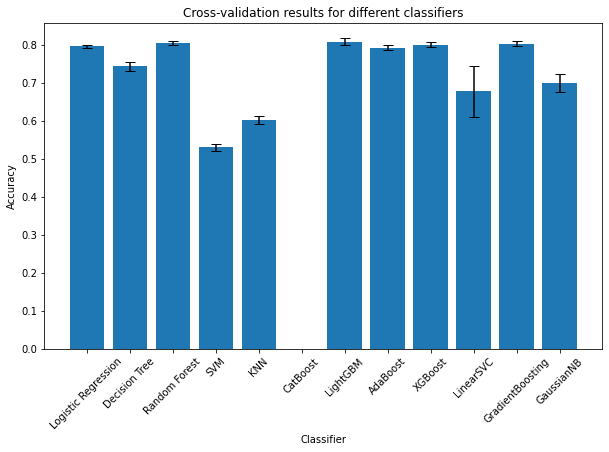

In [63]:
#Bar Plot to analyse the results
plt.figure(figsize=(10, 6))
plt.bar(names, [result.mean() for result in results], yerr=[result.std() for result in results], capsize=5)
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-validation results for different classifiers')
plt.show()

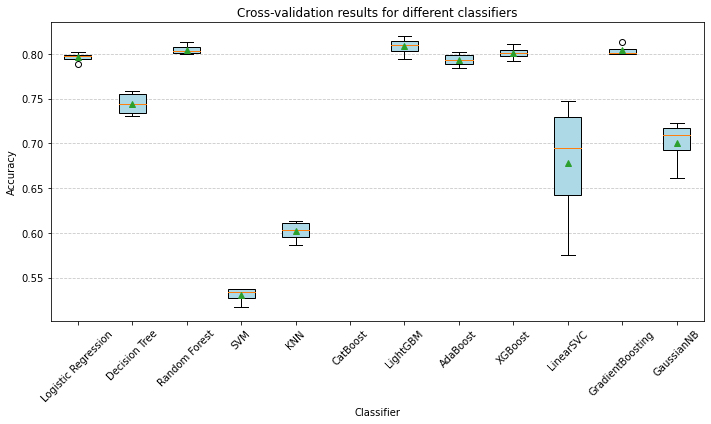

In [64]:
#Box Plot to understand the results to identify outliers
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, showmeans=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-validation results for different classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

**Model Training**

*Goal of training is to make the model learn patterns, relationships, and generalizations from the data*

In [65]:
#verifying the total samples in the dataset
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))

Number of samples in X_test: 2608
Number of samples in y_test: 2608


In [66]:
'''model  = CatBoostClassifier() 
model.fit(X_train, y_train)

predictions1 = model.predict(X_test)

accuracy_score(y_test, predictions)'''

'model  = CatBoostClassifier() \nmodel.fit(X_train, y_train)\n\npredictions1 = model.predict(X_test)\n\naccuracy_score(y_test, predictions)'

In [67]:
#Fitting the model with the data and training the model.
#Making prediction from the trained model to get accuarcy score
model  = lgb.LGBMClassifier() 
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846


0.8009969325153374

In [68]:
#Performing the simplar step for XGBClassifier
model  = lgb.LGBMClassifier(learning_rate=0.03, min_child_samples=10, n_estimators=300, num_leaves=30) 
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846


0.8029141104294478

**Hyperparameter Tunning**

*Search for the best combination of hyperparameters for a machine learning model*

GridSearchCV
* Hyperparameter tuning technique providing a convenient way to perform an exhaustive search over a predefined set of hyperparameter values for a given model. * 
*  Cross-validation helps in obtaining a more reliable estimate of how well the model will perform on unseen data.*

In [69]:
'''param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 30],
    'num_leaves': [30, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

model = lgb.LGBMClassifier()

grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the best model: {accuracy:.4f}")

best_params = grid_search.best_params_
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")'''

'param_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 5, 10],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'min_child_samples\': [10, 20, 30],\n    \'num_leaves\': [30, 50, 100],\n    \'subsample\': [0.8, 1.0],\n    \'colsample_bytree\': [0.8, 1.0],\n    \'reg_alpha\': [0.0, 0.1, 0.5],\n    \'reg_lambda\': [0.0, 0.1, 0.5]\n}\n\nmodel = lgb.LGBMClassifier()\n\ngrid_search = GridSearchCV(model, param_grid, cv=4, scoring=\'accuracy\')\n\ngrid_search.fit(X_train, y_train)\n\nbest_model = grid_search.best_estimator_\n\npredictions = best_model.predict(X_test)\n\naccuracy = accuracy_score(y_test, predictions)\nprint(f"Accuracy of the best model: {accuracy:.4f}")\n\nbest_params = grid_search.best_params_\nprint("Best hyperparameters:")\nfor param, value in best_params.items():\n    print(f"{param}: {value}")'

**Model Evaluation**

*Assessing how well a trained model performs on new, unseen data*
*goal of model evaluation is to understand the model's generalization capabilities and to determine how effective it is in making accurate predictions.*

For Classification Problem, 

- Confusion Matrix : Helps analyze the model's accuracy and error patterns (TP, TN, FP, FN)
- Classification Report : Detailed evaluation of performance metrics for a classification 

In [70]:
print(accuracy_score(y_test, predictions))
print()
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

0.8029141104294478

[[ 999  290]
 [ 224 1095]]

              precision    recall  f1-score   support

       False       0.82      0.78      0.80      1289
        True       0.79      0.83      0.81      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



**Submission**

In [73]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,PassengerId,Name
0,0,1,2,-0.101445,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,820,1,-0.503425,0,0,0,0,0,0,1,0,0013_01,Nelly Carsoning
1,0,0,2,-0.668426,0,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,927,1,0.502231,0,0,0,0,0,1,0,0,0018_01,Lerome Peckers
2,1,1,0,0.182045,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0,1,-0.503425,0,0,1,0,0,0,0,0,0019_01,Sabih Unhearfus
3,1,0,2,0.678153,0,-0.357339,4.121518,-0.312173,-0.104002,0.226648,1,1,2.130740,0,0,1,0,0,0,0,0,0021_01,Meratz Caltilter
4,0,0,2,-0.597554,0,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,1029,1,-0.274383,0,0,0,0,0,1,0,0,0023_01,Brence Harperez


In [74]:
test['PassengerId'] = test['Group'] + '_' + test['Person']
test['Name'] = test['fName'] + ' ' + test['lName']

test.drop(columns=['Group', 'Person', 'fName', 'lName'], inplace=True)

KeyError: 'Group'

In [83]:
import os
model = lgb.LGBMClassifier(learning_rate=0.04, min_child_samples=20, n_estimators=395, num_leaves=31)
model.fit(X_train, y_train)

X_test = test.drop(['PassengerId', 'Name'], axis=1)

predictions = model.predict(X_test)

df_submissions = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': predictions})

if not os.path.exists('./data'):
    os.makedirs('./data')
    
df_submissions.to_csv('./data/submission10.csv', index=False)

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846
